# **PROJECT: INVESTIGATE A DATASET(MEDICAL APPOINTMENT NO SHOW)**

## **TABLE OF CONTENTS**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset **_Medical Appointment No Show_**, contains information about 110,527 medical appointment its 14 associated variables(columns). A person makes a doctor appointment, receives all the instructions and didn't show up for the appointment. We are to check the reason for not showing up.

> Explation of the variable name
- PatientId - Identification of a patient.
- AppointmentID - Identification of each appointment.
- Gender - Male or Female represented as M and F
- ScheduledDay - The day of actual appointment, when they have to vist the doctor
- AppointmentDay - They day the person called or registered the appoinment
- Age - How old patient is
- Neighbourhood - Where the appointment takes place
- Scholarship - 1 representing if the patient is on scholarship and 0 if not
- Hipertension - If the patient is hypertensive(True or False)
- Diabetes - If the patient is diabetic(True or False)
- Alcoholism - If the patient takes alcohol(True or False)
- Handcap - If the patient is handicapped(True or False)
- SMS_received - Number of messages sent to the patient
- No-show - Yes or No, yes indicates the patient didn't show up for the appointment and no indicates the patient showed up for appointment

> Some columns in the dataset have their values changed from True or False to 1 or 0

<a id='intro'></a>
## Question

> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# in this cell I will be importing libraries to investigate this dataset

import numpy as np # this library will be used for transformation
import pandas as pd # this library will be used for data wrangling
import matplotlib.pyplot as plt # this library is for  data visulization
%matplotlib inline  
import seaborn as sns # this library is also used for data visualization
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# this cell is used to load my data

df = pd.read_csv('appointments.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> In the above code cell, I loaded the dataset and examined the first five rows of the dataset and it looks okay.

In [3]:
df.shape # checks the number of rows and columns

(110527, 14)

> Above I checked the number of rows and columns respectively in the dataset using the _df.shape_ command.

In [4]:
df.info() # gives the non-null count and the datatype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> The line of code above returns the data type of each column/feature in the dataset.

### Data Cleaning

In [5]:
df.isnull().sum().sum() # the dataset has zero missing values in total

0

> The above code cell is a check for missing values and from the output above, the data has no missing values

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The code above checks the number of unique values in each column

> Looking at the _PatientId_ column, I expected it to be unique - each patient with his or her own ID but from the output it is save to say that certain patients came more once

> Looking at the _AppointmentID_ from the output above, the number of unique values in this column is same as the number of rows in the dataset. This shows the _AppointmentID_ column won't be useful in this analysis has all patient have different appointment ID. Therefore it is advisable to drop it.


In [7]:
df.drop('AppointmentID', axis=1, inplace=True)

In [8]:
df.shape

(110527, 13)

> Running _df.drop('AppointmentID', axis=1, inplace=True)_ tells Python to drop the _AppointmentID_ along the column axis and inplace tells Python to create a new object, to confirm the column have been dropped I decided to use _df.shape_ and comparing the result of this to the previously ran _df.shape_ we see that the number of columns have reduced - by one.

In [9]:
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> Running the above line of code, one can see that some columns have wrong spelling and I will like to change the punctutation mark in the _No-show_ column.<br>
> To do this I will be using the _rename_ method on the _DataFrame_.

In [10]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

> Comparing the output of this line to the former we can see the columns have better spellings and a comfortable punctuation to work with.

In [11]:
df.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The describe method gives a statistical summary of the numeric features by default.

> A look at the minimum value of the _PatientId_ column shows an incorrect entry as nobody's age is -1

In [12]:
wrong_age = df.query('Age == -1')
wrong_age

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df.drop(wrong_age.index, axis=0, inplace=True)

In [14]:
df.query('Age == -1')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


> After spotting the wrong/inconsistent age from calling the _describe()_ method on the _DataFrame_, I then used the _query()_ method to locate the wrong age and store it in a variable _wrong_age_.

> In the following line I dropped the inconsistent data from the _DataFrame_ along the row and the next line I again used the _query()_ method to check if the data is still present. This returned an empty _DataFrame_ to show that no such value in the _DataFrame_ anymore.

In [15]:
df.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Again looking at the _Age_ column once again, the minimum age appeared to be zero, which is not possible.

In [16]:
zero_age = df.query('Age == 0')
zero_age

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
59,7.184428e+13,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [17]:
df.drop(zero_age.index, axis=0, inplace=True)

In [18]:
df.query('Age == 0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


> As before, I used the _query()_ method to check for rows with age equal to zero(0) and dropped them using the _drop()_ method and again used the _query()_ method to check if age zero(0) is still in the _DataFrame_ which appears to be no.

In [19]:
df.describe()

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The values in the output above appears to be okay

<a id='eda'></a>
## Exploratory Data Analysis

> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [20]:
def plot(x, y, data, hue=None):
    '''
    this function creates a countplot
    '''
    if hue is not None:
        sns.countplot(x=x, data=data, hue=hue)
        plt.title(f'Proportion of {hue} by {x}') 
    else:
        sns.countplot(x=x, data=data)
        plt.title('Proportion of ' + x)

> In the code cell above, a function called _plot_ is created, _plot_ makes _countplot_ using the Seaborn library, it takes four parameters, x - value that will be plotted on the x-axis, y - value to be plotted on the y-axis, data - the dataset in use, hue - this adds colour to the plot.

> This function helps to prevent  repetitive code.

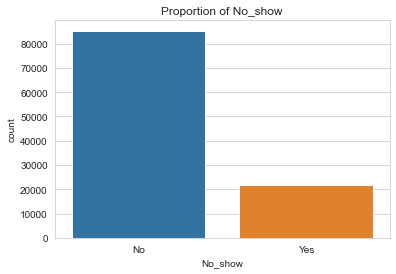

In [21]:
plot(x='No_show', y=None, data=df)

> In other to answer the question, first I take a look at the proportion of turn outs for appointment and from the above one can clearly see that more patients turned out for their appointment, the labels _No_ representing patients that showed up for appointment and _Yes_, representing patients that didn't show up for their appointment.

In [22]:
gender_count = df['Gender'].value_counts()
gender_count

F    70118
M    36869
Name: Gender, dtype: int64

> In the above cell, I found the count of each unique values in the _Gender_ column and stored it in a variable called _gender_count_.

Text(0.5, 1.0, 'Gender')

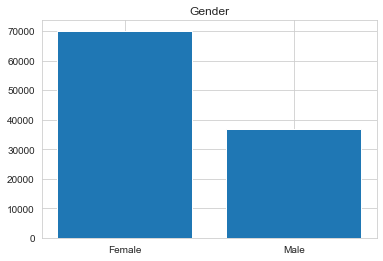

In [23]:
plt.bar(['Female', 'Male'], [gender_count[0], gender_count[1]],)
plt.title('Gender')

>  For this 2d plot, I unpacked the values stored in varible _gender_count_ in the preceeding code cell and assigned it to the y-axis and created labels - Female and Male, and assigned it to the x-axis.

> This plot shows the count of both male and female that registered for an appointment and looking at the plot more females registered for appointment.

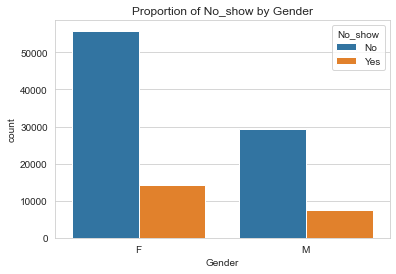

In [24]:
plot(x='Gender', y=None, data=df, hue='No_show')

> In the plot above, I tried to determine if gender is a factor for a patient to show up for his/her appointment. From the above, the gender was first splitted into female and male, then I was able to determine the number of females and males that showed up for their appointment by passing the _hue_ parameter.

> It is shown from the above that females showed up for their appointment more, also, females missed their appointments more, this can be as a result of females having more population than the male in the dataset. One can conclude that gender is a factor to know if the patient will show up for appointment.

Text(0.5, 1.0, 'Distribution of Age')

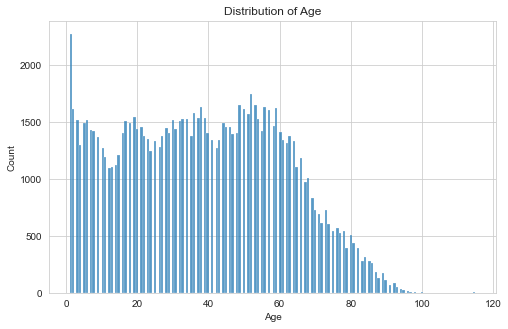

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=178)
plt.title('Distribution of Age')


> The plot above shows the distribution of ages of patients that have been scheduled for appointment and from the plot the patients with highest number of appointments are below the age of three(3) after the age of sixty(60) the number of appointments reduced.

> Now let's try to know if the difference between the _ScheduledDay_ and _AppointmentDay_ is a factor to predict if a patient will show up for their appointment.

In [26]:
df['Difference'] = df['ScheduledDay'] - df['AppointmentDay']
df['Difference'].head()

0   0 days 18:38:08
1   0 days 16:08:27
2   0 days 16:19:04
3   0 days 17:29:31
4   0 days 16:07:23
Name: Difference, dtype: timedelta64[ns]

> Above I took the difference between the _ScheduledDay_ and the _AppointmentDay_ and store the result in a new column named _Difference_.

In [27]:
df['Difference'].min()

Timedelta('-179 days +10:40:59')

> The above result implies that the appointment was scheduled 179 days before the patient called to schedule an appointment.

> To resolve this the first step I'm taking is to get the rows where the _ScheduledDay_ is before the _AppointmentDay_ and swap the values.

In [28]:
wrong_appointment = df.query('AppointmentDay > ScheduledDay')
wrong_appointment.shape

(69828, 14)

> From the above result, 698288 rows have their _ScheduledDay_ before their _AppointmentDay_. This is more than half of the dataset dropping this will affect the dataset.

In [29]:
df.loc[wrong_appointment.index, ['ScheduledDay', 'AppointmentDay']] = df.loc[wrong_appointment.index, ['AppointmentDay', 'ScheduledDay']].values

> The above cell swaps the values where the _AppointmentDay_ is before the _ScheduledDay_as this could have been an error when putting this data in file.

In [30]:
df['DayDifference'] = (df['ScheduledDay'] - df['AppointmentDay']).dt.days

> After replacing the values, I calculated the difference between the _ScheduledDay_ and the _AppointmentDay_ and stored it in a new column named _DayDifference_ this column holds only the number of days between the appointment

In [31]:
df.drop('Difference', axis=1, inplace=True)

> Above I dropped the _Difference_ column which holds the difference between the _ScheduledDay_ and _AppointmentDay_ before swapping the values where the appointment was scheduled before the appointment day.

In [32]:
def grouper(data, column1, column2):
    '''
    this function creates a dataframe by grouping and
    applying a count method on the groupby object
    '''
    grouped = data.groupby([column1, column2]).count()
    return grouped

> The above code cell is a function which creates a dataframe, after using the _groupby_ and _count_ method. The function takes in three parameters - the dataframe, the columns(in this case I am grouping by two columns in the dataframe).

In [33]:
grouper(df, 'No_show', 'DayDifference')

PatientId  Gender  ScheduledDay  AppointmentDay    Age  \
No_show DayDifference                                                           
No      0                  39366   39366         39366           39366  39366   
        1                   5052    5052          5052            5052   5052   
        2                   2016    2016          2016            2016   2016   
        3                   4003    4003          4003            4003   4003   
        4                   2350    2350          2350            2350   2350   
...                          ...     ...           ...             ...    ...   
Yes     154                    6       6             6               6      6   
        161                    2       2             2               2      2   
        168                    1       1             1               1      1   
        175                    6       6             6               6      6   
        178                    2       2             2               2      2   

                       Neighbourhood  Scholarship  Hypertension  Diabetes  \
No_show DayDifference                                                       
No      0                      39366        39366         39366     39366   
        1                       5052         5052          5052      5052   
        2                       2016         2016          2016      2016   
        3                       4003         4003          4003      4003   
        4                       2350         2350          2350      2350   
...                              ...          ...           ...       ...   
Yes     154                        6            6             6         6   
        161                        2            2             2         2   
        168                        1            1             1         1   
        175                        6            6             6         6   
        178                        2            2             2         2   

                       Alcoholism  Handicap  SMS_received  
No_show DayDifference                                      
No      0                   39366     39366         39366  
        1                    5052      5052          5052  
        2                    2016      2016          2016  
        3                    4003      4003          4003  
        4                    2350      2350          2350  
...                           ...       ...           ...  
Yes     154                     6         6             6  
        161                     2         2             2  
        168                     1         1             1  
        175                     6         6             6  
        178                     2         2             2  

[232 rows x 12 columns]

> In the above code cell, I grouped the DataFrame by _No_show_ and _DayDifference_ column in the dataset and applied the _count_ method on it, this gives the count of rows that falls under both criteria - the _No_show_ and _DayDifference_ criteria. From the result, it can be seen that patients with lesser days from their appointment turn out the more and the ones with larger days do not turn out more.

Text(0.5, 1.0, 'Proportion of No_show by DayDifference')

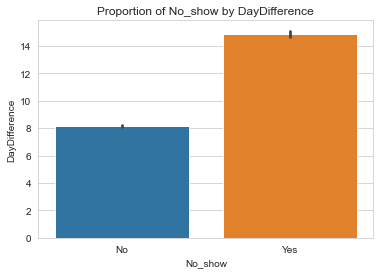

In [34]:
sns.barplot(x=df.No_show, y=df.DayDifference)
plt.title('Proportion of No_show by DayDifference')

> One can see that the higher the number of difference between the _ScheduledDay_ and the _AppointmentDay_ the higher the rate of no show up from the patient. Therefore reducing the difference between the _ScheduledDay_ and _AppointmentDay_ will increase the rate of show up for appointment. One can definately say that the numbers of days between the _ScheduledDay_ and _AppointmentDay_ is a factor that determines if a patient will show up for appointment or not.

> Again let's see if the day the appointment falls on determines is a factor to predict if the patient will show up for the scheduled appointment.

In [35]:
df['DayName'] = df['ScheduledDay'].dt.day_name()

> This added column tells the day name - Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, the appointment falls on.

In [36]:
grouper(df, 'No_show', 'DayName')

PatientId  Gender  ScheduledDay  AppointmentDay    Age  \
No_show DayName                                                             
No      Friday         14525   14525         14525           14525  14525   
        Monday         17388   17388         17388           17388  17388   
        Saturday          30      30            30              30     30   
        Thursday       13415   13415         13415           13415  13415   
        Tuesday        19807   19807         19807           19807  19807   
        Wednesday      20142   20142         20142           20142  20142   
Yes     Friday          3940    3940          3940            3940   3940   
        Monday          4514    4514          4514            4514   4514   
        Saturday           9       9             9               9      9   
        Thursday        3244    3244          3244            3244   3244   
        Tuesday         5023    5023          5023            5023   5023   
        Wednesday       4950    4950          4950            4950   4950   

                   Neighbourhood  Scholarship  Hypertension  Diabetes  \
No_show DayName                                                         
No      Friday             14525        14525         14525     14525   
        Monday             17388        17388         17388     17388   
        Saturday              30           30            30        30   
        Thursday           13415        13415         13415     13415   
        Tuesday            19807        19807         19807     19807   
        Wednesday          20142        20142         20142     20142   
Yes     Friday              3940         3940          3940      3940   
        Monday              4514         4514          4514      4514   
        Saturday               9            9             9         9   
        Thursday            3244         3244          3244      3244   
        Tuesday             5023         5023          5023      5023   
        Wednesday           4950         4950          4950      4950   

                   Alcoholism  Handicap  SMS_received  DayDifference  
No_show DayName                                                       
No      Friday          14525     14525         14525          14525  
        Monday          17388     17388         17388          17388  
        Saturday           30        30            30             30  
        Thursday        13415     13415         13415          13415  
        Tuesday         19807     19807         19807          19807  
        Wednesday       20142     20142         20142          20142  
Yes     Friday           3940      3940          3940           3940  
        Monday           4514      4514          4514           4514  
        Saturday            9         9             9              9  
        Thursday         3244      3244          3244           3244  
        Tuesday          5023      5023          5023           5023  
        Wednesday        4950      4950          4950           4950

> Again, I grouped the DataFrame using the _No_show_ and the _DayName_ columns and applied the _count_ method on it. The result shows the number of patients that turn out for their and the number of patients that didn't turn out for their appointment during these week days. Looking at the result one can that _Saturday_ has a very low turn out.

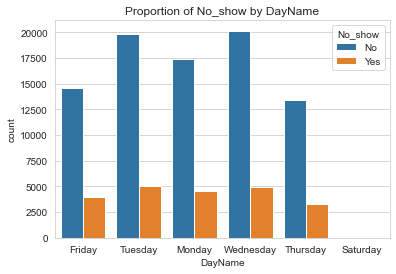

In [37]:
plot(x='DayName', y=None, data=df, hue='No_show')

> As seen from the chart above, the day of the week an appointment falls on is a factor that determines if the patient shows up or not, _Saturday_ recorded the lowest show up of patient that it is not visible on the chart. 

### Does age group affect patients turn up for appointment?

> To do this, I will be putting the ages into age group to make it easier, I will use the _cut_ method from pandas to put different ages into groups.

In [38]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[1, 2, 4, 12, 19, 39, 59, np.inf], 
                        labels=['infant', 'toddler', 'child', 'teen', 'adult', 'middle age adult', 'senior adult'])
df['AgeGroup'].head()

0        senior adult
1    middle age adult
2        senior adult
3               child
4    middle age adult
Name: AgeGroup, dtype: category
Categories (7, object): ['infant' < 'toddler' < 'child' < 'teen' < 'adult' < 'middle age adult' < 'senior adult']

In [39]:
grouper(df, 'No_show', 'AgeGroup')

PatientId  Gender  ScheduledDay  AppointmentDay  \
No_show AgeGroup                                                            
No      infant                 1366    1366          1366            1366   
        toddler                2253    2253          2253            2253   
        child                  8352    8352          8352            8352   
        teen                   6941    6941          6941            6941   
        adult                 22190   22190         22190           22190   
        middle age adult      24416   24416         24416           24416   
        senior adult          17931   17931         17931           17931   
Yes     infant                  252     252           252             252   
        toddler                 559     559           559             559   
        child                  2442    2442          2442            2442   
        teen                   2434    2434          2434            2434   
        adult                  6680    6680          6680            6680   
        middle age adult       5656    5656          5656            5656   
        senior adult           3242    3242          3242            3242   

                            Age  Neighbourhood  Scholarship  Hypertension  \
No_show AgeGroup                                                            
No      infant             1366           1366         1366          1366   
        toddler            2253           2253         2253          2253   
        child              8352           8352         8352          8352   
        teen               6941           6941         6941          6941   
        adult             22190          22190        22190         22190   
        middle age adult  24416          24416        24416         24416   
        senior adult      17931          17931        17931         17931   
Yes     infant              252            252          252           252   
        toddler             559            559          559           559   
        child              2442           2442         2442          2442   
        teen               2434           2434         2434          2434   
        adult              6680           6680         6680          6680   
        middle age adult   5656           5656         5656          5656   
        senior adult       3242           3242         3242          3242   

                          Diabetes  Alcoholism  Handicap  SMS_received  \
No_show AgeGroup                                                         
No      infant                1366        1366      1366          1366   
        toddler               2253        2253      2253          2253   
        child                 8352        8352      8352          8352   
        teen                  6941        6941      6941          6941   
        adult                22190       22190     22190         22190   
        middle age adult     24416       24416     24416         24416   
        senior adult         17931       17931     17931         17931   
Yes     infant                 252         252       252           252   
        toddler                559         559       559           559   
        child                 2442        2442      2442          2442   
        teen                  2434        2434      2434          2434   
        adult                 6680        6680      6680          6680   
        middle age adult      5656        5656      5656          5656   
        senior adult          3242        3242      3242          3242   

                          DayDifference  DayName  
No_show AgeGroup                                  
No      infant                     1366     1366  
        toddler                    2253     2253  
        child                      8352     8352  
        teen                       6941     6941  
        adult                     22190    22190  
        middle age

> Above the DataFrame is grouped by the _No_show_ and the _AgeGroup_ column and _count_ method is applied on it.

> Infants and toddlers recorded low turn out and this is okay is some sense as infants and toddlers can't go to their place of appointment by themselves and adults who are able to move show the largest turn out for their appointment. The two age groups with largest turn out are the _adult_ and _middle age adult_.

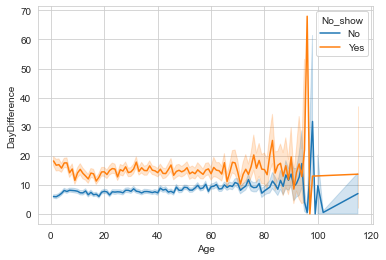

In [40]:
sns.lineplot(x=df.Age, y=df.DayDifference, hue=df.No_show);

> The plot above shows that the people with higher day difference miss their appointment the more.

In [41]:
age_90 = df.query('Age < 90')

age_90.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayDifference,DayName,AgeGroup
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,senior adult
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,middle age adult
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,senior adult
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,child
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,middle age adult


> Because few ages are above 90, the code cell above creates a DataFrame with ages less than 90 years.

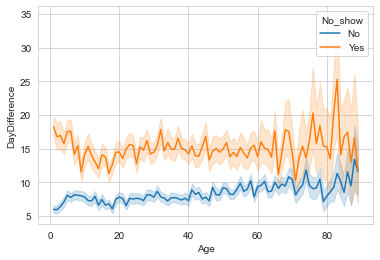

In [42]:
sns.lineplot(x=age_90.Age, y=age_90.DayDifference, hue=age_90.No_show);

> The plot above gives a larger view of ages less than 90 and one can see that for all ages with bigger number of days missed their appointment.

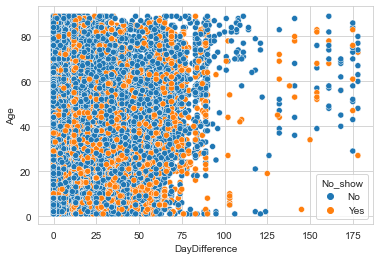

In [43]:
sns.scatterplot(x=age_90.DayDifference, y=age_90.Age, hue=age_90.No_show);

> From the above plot we see that older people tend to forget their appointment schedule more.

<a id='conclusions'></a>
## Conclusions

> For this project, quite a number of cleaning process was used, from dropping non-useful column to dropping missing values, filtering out outliers and inconsistent data, renaming of missplet columns, which made up my data cleaning processes.

> From the analysis made of this dataset, one can clearly see that some factors determine if a patient will show up for appointment or not, some of these factors are the difference between the _ScheduledDay_ and the _AppointmentDay_. From the analysis one could see that patients having a high differnce between their _ScheduleDay_ and _AppointmentDay_ tend not to show up for their appointment, and this could be as a result of forgetfullnes. 
Another finding worth pointing out is the day of the week the appointment falls on, from the chart plotted earlier one can see that __Saturday__ has the lowest turn out of patients. The turn out of patients is so low that the chart could not capture it well. Also the age of the patient is a factor that determines if the patient will show up for the scheduled apppointment, from the chart plotted earlier one can see that patients over age 80 tend not to show up for their appointment and there was a drastic no show up rate for patients close to hundred and a fall after that, this is due to the fact that few patients are over the age of hundred.

<a id='limit'></a>
## Limitation

>One of the limitations encountered during my analysis is the inconsitent data. During analysis I found out that for some observations the _AppointmentDay_ - the day the patient called to schedule an appointment is greater than the _ScheduledDay_ - the day a patient is meant to meet with the doctor, which shouldn't be and this implies that the patient met with the doctor before calling for appointment.

>I dealt with this by swapping the observations where the _AppointmentDay_ is greater than the _ScheduledDay_ as this might be an entry error from the person entering the data into a file.